In [23]:
import pandas as pd

df = pd.read_csv('data/november_raw_data.csv')

df.head()

,Departure Airport,Departure Time,Arrival Airport,Arrival Time,Carrier Code,Flight Number,Price (VND),Duration
0,SGN,2024-11-01T05:00:00,HAN,2024-11-01T07:10:00,VJ,194,1546000.0,PT2H10M
1,SGN,2024-11-01T05:20:00,HAN,2024-11-01T07:30:00,VJ,198,1546000.0,PT2H10M
2,SGN,2024-11-01T06:00:00,HAN,2024-11-01T08:10:00,VJ,120,1546000.0,PT2H10M
3,SGN,2024-11-01T06:30:00,HAN,2024-11-01T08:40:00,VJ,122,1546000.0,PT2H10M
4,SGN,2024-11-01T07:30:00,HAN,2024-11-01T09:40:00,VJ,126,1546000.0,PT2H10M


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287146 entries, 0 to 287145
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Departure Airport  287146 non-null  object 
 1   Departure Time     287146 non-null  object 
 2   Arrival Airport    287146 non-null  object 
 3   Arrival Time       287146 non-null  object 
 4   Carrier Code       287146 non-null  object 
 5   Flight Number      287146 non-null  int64  
 6   Price (VND)        287146 non-null  float64
 7   Duration           287146 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 17.5+ MB


In [ ]:
df['Duration'] = df['Duration'].str.findall(r'\d+').str.join('')
df['Duration'] = pd.to_numeric(df['Duration'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287146 entries, 0 to 287145
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Departure Airport  287146 non-null  object 
 1   Departure Time     287146 non-null  object 
 2   Arrival Airport    287146 non-null  object 
 3   Arrival Time       287146 non-null  object 
 4   Carrier Code       287146 non-null  object 
 5   Flight Number      287146 non-null  int64  
 6   Price (VND)        287146 non-null  float64
 7   Duration           287146 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 17.5+ MB


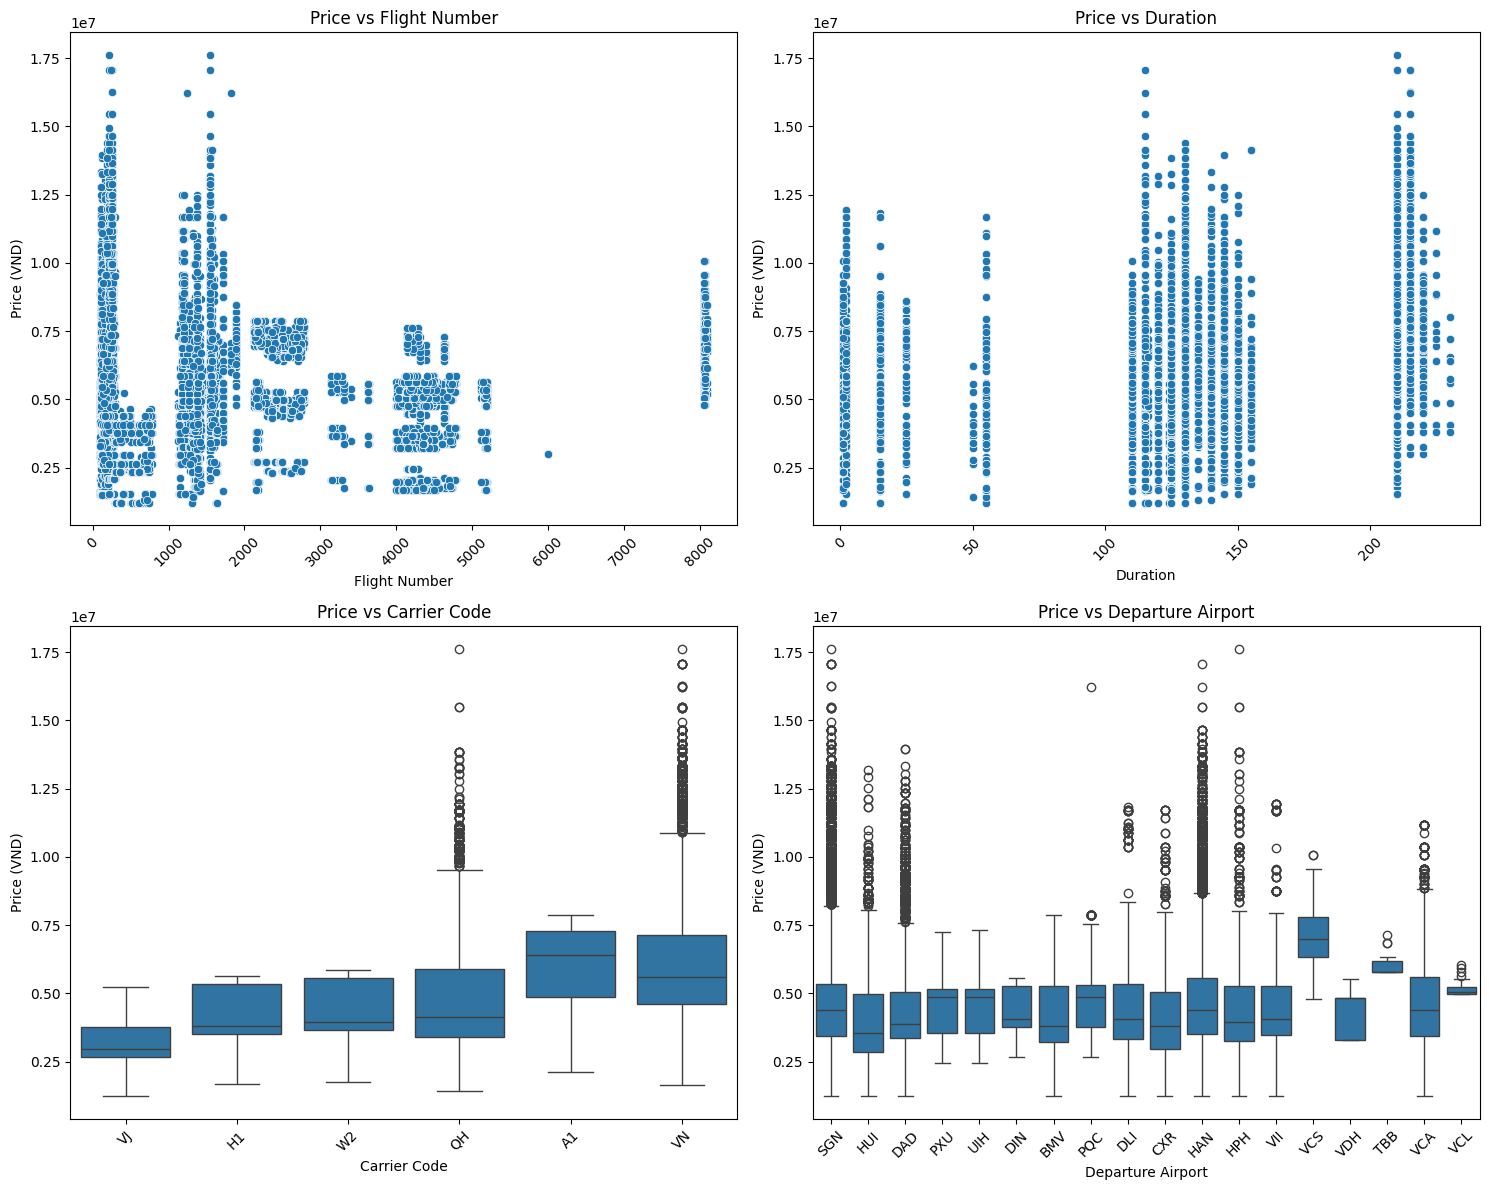

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo 2 hàng, 2 cột subplot để vừa đủ cho 4 biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

# Vẽ biểu đồ cho các biến số
sns.scatterplot(data=df, x='Flight Number', y='Price (VND)', ax=axes[0])
axes[0].set_title('Price vs Flight Number')
axes[0].tick_params(axis='x', rotation=45)

sns.scatterplot(data=df, x='Duration', y='Price (VND)', ax=axes[1])
axes[1].set_title('Price vs Duration')
axes[1].tick_params(axis='x', rotation=45)

# Vẽ biểu đồ cho các biến categorical
sns.boxplot(data=df, x='Carrier Code', y='Price (VND)', ax=axes[2])
axes[2].set_title('Price vs Carrier Code')
axes[2].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='Departure Airport', y='Price (VND)', ax=axes[3])
axes[3].set_title('Price vs Departure Airport')
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

